# Unit 1 Project : HW #2 Part II [NEUR 3002]




*Group 12 Member Names* :
>**Betania Kassahun, Charlie Myungchul Jung,Ishani Saha, Jeffrey Robert Hullinger II, Naeema Qureshi, Samia Ahmed, Shray Kiran Shah**

<u>IF Model:</u> A mathematical model describing how neurons respond to stimuli. It includes two components: an equation that describes the membrane potential and a spike generator. If the desired membrane potential is reached the a spike will be generated. The model uses bits of information as its final output generator ( 0 = do not fire or 1 = fire an AP). ([Source](https://neuronaldynamics.epfl.ch/online/Ch1.S3.html))


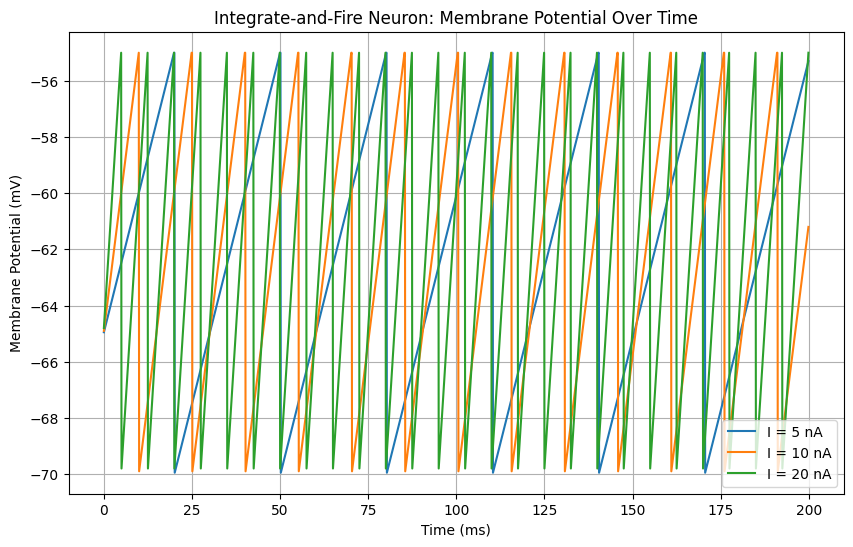

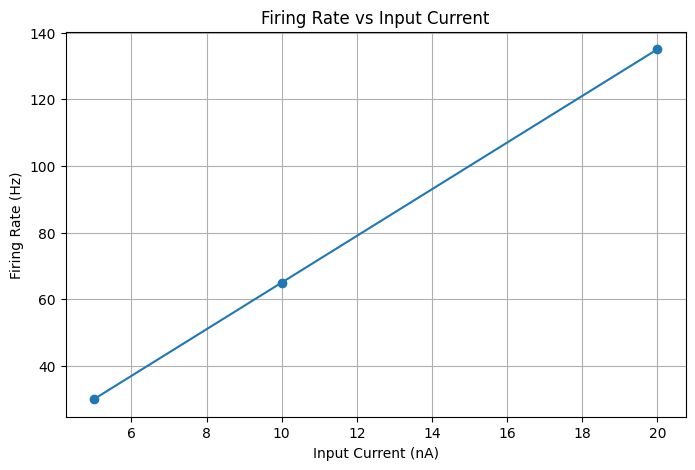

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
tau_m = 10
R = 1
V_rest = -65
V_reset = -70
V_th = -55
delta_t = 0.1
T = 200
I_values = [5, 10, 20]

# Time vector
time = np.arange(0, T, delta_t)

# Function to simulate IF neuron
def integrate_and_fire(I):
    V = V_rest  # Initialize membrane potential
    V_trace = []  # Record membrane potential over time
    spike_times = []  # Record spike times

    for t in time:
        # Update membrane potential
        delta_V = (-(V - V_rest) + R * I) * (delta_t / tau_m)
        V += delta_V

        if V >= V_th:  # Spike condition
            V_trace.append(V_th)  # Record the spike
            spike_times.append(t)  # Record the time of the spike
            V = V_reset  # Reset potential
        else:
            V_trace.append(V)

    return V_trace, spike_times

# Plot results
plt.figure(figsize=(10, 6))
for I in I_values:
    V_trace, spike_times = integrate_and_fire(I)
    plt.plot(time, V_trace, label=f"I = {I} nA")

plt.title("Integrate-and-Fire Neuron: Membrane Potential Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

# Analyze firing rates
firing_rates = []
for I in I_values:
    _, spike_times = integrate_and_fire(I)
    firing_rate = len(spike_times) / (T / 1000)  # Spikes per second (Hz)
    firing_rates.append(firing_rate)


plt.figure(figsize=(8, 5))
plt.plot(I_values, firing_rates, marker='o')
plt.title("Firing Rate vs Input Current")
plt.xlabel("Input Current (nA)")
plt.ylabel("Firing Rate (Hz)")
plt.grid()
plt.show()

Using Markdown Cells to answer the question: Looking at the above visualization / based on what you know regarding the LIF model—

**3A) What aspect of this model is most unlike a real biological neuron?** One aspect of this model that is most unlike a real biological neuron is its lack of dynamic ion channel behavior. A real neuron would have voltage gated ion channels that are responsible for helping with the initiation and propagation of action potentials. This then results in various complex dynamics that depend on factor like time, membrane potential, etc. However, the LIF model simplifies this by treating the membrane as a passive resistor capacitor circuit and using a simple threshold reset mechanism for spikes.

**3B) What is missing?**
In relevance to Q3A, the primary component that our *IF* Model is missing is the leaky ion channel. Compared to a real biological neuron that consists of leaky ion channels—e.g., Leaky Potassium Channel—that would induce a nonlinear rise of membrane potential from injected current, our green lines from the first graph illustrate a linear rise of membrane potential between the times of injection to threshold. In other words, the *IF* model simplifies the various components of the neuronal membranes down into just a few.

**3C) What aspects are like a biological neuron? Compare and Contrast the two.**
One of the aspects that is like a neuron is that tne spike trains will fire if membrane potential reaches a value. This is shown in the model, as reaching roughly -55 mV causes spike trains as seen by the green line, whereas anything below threshold does not cause the spike trains as seen by the orange and blue lines in the first graph. In summary, a biological neuron has a distinct threshold which this model demonstrates. This model also shows how firing rate is dependent on input current as seen in the second figure as a real biological neuron's firing rate is also dependent on input current. Therefore, both model and biological neurons show that information can be encoded in the frequency of this firing rate.

4)


**5) What was the most challenging aspect of this homework?**
The most challenging aspect of the homework was to adapt to the interface of Jupyter Notebook and GoogleColab, for the layout of the both sites are relatively different from each other. Lastly, submitting to the GitHub proved to be slightly challenging as well.

**6) Estimate how long it took you to complete this homework**
The homework took around 40 minutes to completely finish.

# Unit 1 Project: HW #3 - Project Part III

#1
**Leaky Intergrate and Fire Neuron Model (LIF)**
The LIF is a mathematical model of a neuron displays the stimulation of neuron, similarly to the I&F model. However, it incorporates leaky ion channels which depict the natural decay of membrane potential following the action potential threshold being reached. Additionally, a limitation of the model is that it can't propogate AP and needs a spike generator to reach threshold by use of an electrochemical gradient.

**Hodgkin-Huxley (HH) model**
The most prominent mathmateical model of a neuron employs voltage gate sodium and potassium channels to display neural activation and propogation of action poetntial in addition to the features displayed in the LIF model. It is the first model to incorporate a method of propogating action potential with the use of the ion channels to reach threshold.

#2 : Code below visualizes the **LIF model**

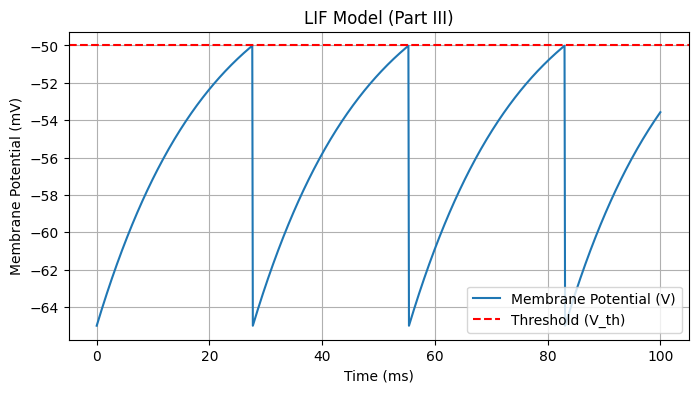

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 100   # total simulation time (ms)
time = np.arange(0, T + dt, dt)

# LIF model parameters
tau_m = 20.0  # membrane time constant (ms)
R_m = 1.0     # membrane resistance (MΩ)
V_th = -50.0  # spike threshold (mV)
V_reset = -65.0  # reset potential (mV)
V_rest = -65.0   # resting potential (mV)

# Significantly increasing input current to ensure threshold crossing
I = 20.0  # Stronger input current (nA)

# Re-initialize membrane potential
V = np.full_like(time, V_rest)

# Simulation loop
for t in range(1, len(time)):
    dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt
    V[t] = V[t-1] + dV
    if V[t] >= V_th:
        V[t] = V_reset  # reset after spike

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, V, label="Membrane Potential (V)")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold (V_th)")
plt.title('LIF Model (Part III)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

#3 : Inputs now differ as **bursts**!

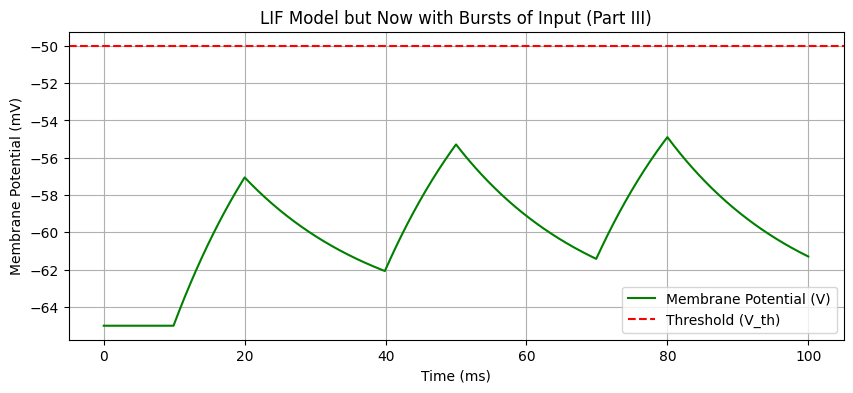

In [ ]:
#For Burst
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 100   # Total simulation time (ms)
time = np.arange(0, T + dt, dt)

# LIF model parameters
tau_m = 20.0  # Membrane time constant (ms)
R_m = 1.0     # Membrane resistance (MΩ)
V_th = -50.0  # Spike threshold (mV)
V_reset = -65.0  # Reset potential (mV)
V_rest = -65.0   # Resting potential (mV)

# Generating burst input current
I = np.zeros_like(time)
burst_intervals = [(10, 20), (40, 50), (70, 80)]  # Burst periods (start, end)

for start, end in burst_intervals:
    I[(time >= start) & (time <= end)] = 20.0  # Apply current during bursts

# Initialize membrane potential
V = np.full_like(time, V_rest)

# Simulation loop
for t in range(1, len(time)):
    dV = (-(V[t-1] - V_rest) + R_m * I[t]) / tau_m * dt
    V[t] = V[t-1] + dV
    if V[t] >= V_th:
        V[t] = V_reset  # Reset after spike

# Plot only the membrane potential
plt.figure(figsize=(10, 4))
plt.plot(time, V, color='g', label="Membrane Potential (V)")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold (V_th)")
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.title('LIF Model but Now with Bursts of Input (Part III)')
plt.legend()
plt.grid(True)

plt.show()

- The input current was changed from constant input ("I = 20.0") to bursts at 20-30 ms and 50-60 ms ("I = np.zeros_like(time); burst_intervals = [(10, 20), (40, 50), (70, 80)]"). Outside of these bursts the input current was 0 nA, indicating the neuron has returned to rest. By changing the input current from always being equal to 20 we were able to visualize a different pattern, where input was being applied in increments.

- The membrane potential code was also changed from "dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt" to "dV = (-(V[t-1] - V_rest) + R_m * I[t]) / tau_m * dt". The first eqaution was dependent on a constant input. By adding I[t] the neuron will only receive input during a brut period versus always being active.This was seen in the shift of spikes on the second plot.


#4
**What changes had to be made to update the model and why?**\
Compared to our previous version (Part II), this model underwent a notable update regarding an addition of a whole new component—the leaky channels. This was done to align the shift in our neuronal representation from a mere IF model to our (selected) LIF model. If our model from Part II contained just an expression of how an injected current linearly alters the membrane potential until threshold, this updated model now represents a rather nonlinear increase in potential due to our implementation of leaky channels.

**How did you and/or ChatGPT implement the changes? As part of your answer provide in "" the new parts of the code that produce this change.**\
The major implementation to reflect such an addition of leaky channels involved altering the equation that calculates the variable 'dV.' Although our part II did not explictly use the first formula, the changes made to the equations were:
- For *IF model* :
"dV = (R_m * I) / tau_m * dt"
-For *UPDATED LIF model* :
"dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt" <br>
(this equation differs for the bursting model, and such a change is discussed more in-depth in Q3)

This visible change to our formula also accurately reflects the difference in a mathematical approach to these neuronal models, for the incorporation of the leaky channels from the latter makes the model more complex.

**Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy? Explain your answer**

Bits refer to the basic units of information used in information theory that predict uncertainty or surprise. 1 Bit represents a choice between two equally probable choices/alternatives. Shannon's entropy measures uncertainty or information content in a system. The Hodgkin-Huxley model contains the most bits because it has a higher state of state variables and allows for richer neuron behaviors such as spikes, oscillations, etc. With more state variables, there are more states to encode thus containing more bits. The LIF model only tracks the membrane potential and resets after spiking, so less information is needed to describe its behavior. HH model has the highest Shannon's entropy as well because it has more possible states with different probabilities equating to a higher entropy.

#5

We actually decided as a group not to utilize GitHub to edit our responses collaboratively. The group decided it would be much more efficient to simply use Google Colab than to use GitHub, for we could simply use the previous file and add on our responses. Some members also said they were not as comfortable in using GitHub as they had little prior exposure. However, we may still consider using GitHub for our final submission if deemed more helpful!